In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten, Conv2D,Dropout,AveragePooling2D,MaxPool2D, BatchNormalization
from tensorflow.keras.models import Sequential

In [132]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


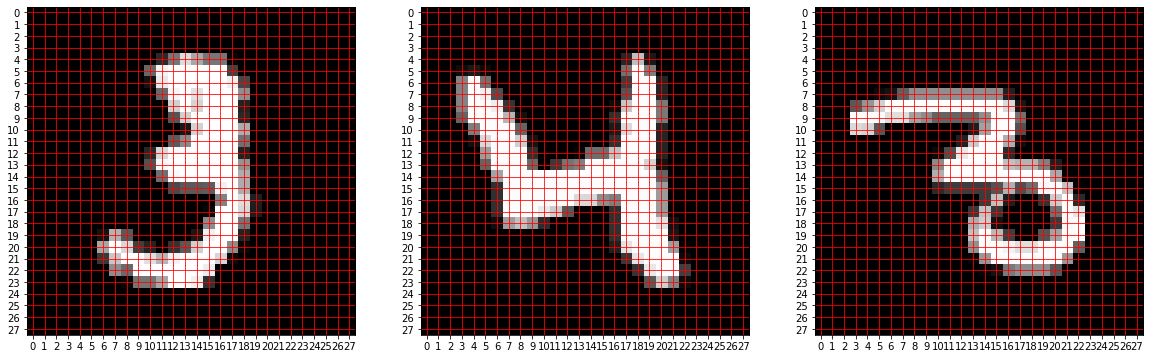

In [133]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))


xshape = x_train.shape[1:]

import matplotlib.pyplot as plt
ii=10
f,ax=plt.subplots(1,3,figsize=(20,8))

for i,ii in enumerate([10,20,30]): 


  ax[i].imshow(x_train[ii,...].reshape(28,28),cmap='gray')
  ax[i].grid(visible=True,which='both',color='r')
  ax[i].set_xticks(np.arange(28))
  ax[i].set_yticks(np.arange(28))


The size of each image is 28*28, Howeveer we can observe that maximum number of feature and feature transitions like edge, lines_segments, cross-features are bounded within sub-grids of max 3*3

The distinctive patterns are only a few in number, that means that not each grid or collection of grids has some different property. A similar kind of pattern is repeated across various 2-D combinations across the entire image 

The patterns of the features are repeated across the grid-space and thus we can make use of this consistent-repetitive behaviour by utilizing some convolution layers in our network.

There are 10 distict kind of elements present in this image repository.
Cross, edges (both in x and y) directions and some slliptical curves should be enough to determine primary characteristics of each image.

However these images may be shifted, translated and thus there would be some difference in orientation on primary characteristic features.

I will consider this all while preparing my network for predicting this dataset

Each convolution map used in the first layer will be 3*3 in size and I will also use relu activation function for accentuating the patterns that are determined by the conv2d maps

In [143]:
# Within Convolution layers the weights and the bias layers of the conv map are the parameters that get trained, The original image_array gets convolved, slightly compressed and passed on for further 
#processing, 
# Making use of thie fact that the output has been convolved with 2d maps we can use pooling transformation apply it on the convolved output and store the statistic for a particular grid-size
# In my case I will use a smaller window of 2*2 (smaler than 3*3) and use average statistic to pool each convolved maps

#Next I will try to create convolution maps for these pre-convolved features in order to determine some features that are cross of simple convolution maps, curvilinear corners that are meeting points of 2-d eliptical edges are hard to be detremined at times 
#at times
#I will pool these convolved maps again and then finally flatten them to use the numbers are features for performing classification  

mnist_model=Sequential([
                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        MaxPool2D(pool_size=(2,2)),
                        Conv2D(filters=64,kernel_size=(3,3),strides=(1,1)),
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
                        Dense(32,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
                        Dense(10,activation=tf.nn.softmax)                                              
                        
])

mnist_model.summary()



Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 576)               0         
                                                                 
 dense_53 (Dense)            (None, 128)             

In [76]:
mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [77]:
mnist_model.fit(x_train,y_train,epochs=25,validation_split=0.2,batch_size=200)


Epoch 1/25
240/240 [==============================] - 4s 14ms/step - loss: 1.2967 - accuracy: 0.8918 - val_loss: 0.7110 - val_accuracy: 0.9698
Epoch 2/25
240/240 [==============================] - 3s 13ms/step - loss: 0.5643 - accuracy: 0.9679 - val_loss: 0.4276 - val_accuracy: 0.9756
Epoch 3/25
240/240 [==============================] - 3s 13ms/step - loss: 0.3647 - accuracy: 0.9731 - val_loss: 0.2960 - val_accuracy: 0.9801
Epoch 4/25
240/240 [==============================] - 3s 13ms/step - loss: 0.2783 - accuracy: 0.9758 - val_loss: 0.2623 - val_accuracy: 0.9762
Epoch 5/25
240/240 [==============================] - 3s 13ms/step - loss: 0.2292 - accuracy: 0.9793 - val_loss: 0.2230 - val_accuracy: 0.9792
Epoch 6/25
240/240 [==============================] - 3s 13ms/step - loss: 0.2021 - accuracy: 0.9808 - val_loss: 0.1955 - val_accuracy: 0.9822
Epoch 7/25
240/240 [==============================] - 3s 13ms/step - loss: 0.1842 - accuracy: 0.9820 - val_loss: 0.1830 - val_accuracy: 0.9818

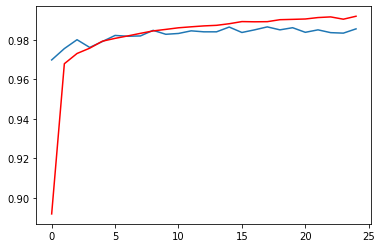

In [78]:
dir(mnist_model.history)
plt.plot(mnist_model.history.history['val_accuracy'])
plt.plot(mnist_model.history.history['accuracy'],c='r')


In [126]:
print('This model predicts '+str(mnist_model.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 1s 4ms/step - loss: 0.0983 - accuracy: 0.9873
This model predicts 98.72999787330627% of the test data correctly


In [123]:
#I will try normalizing the input data
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)


u=np.mean(x_train,axis=0)
dev=np.std(x_train,axis=0)

max(u),min(u),max(dev),min(dev)
x_train=(x_train-u)/(dev+1e-1)
x_test=(x_test-u)/(dev+1e-1)

x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))

# max(np.mean((x_train-u)/(dev+1e-1),axis=0))
# np.min((x_train-u)/(dev+1e-1))
# dev

mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


mnist_model.fit(x_train,y_train,epochs=25,validation_split=0.2,batch_size=200)


Epoch 1/25
240/240 [==============================] - 4s 14ms/step - loss: 1.2885 - accuracy: 0.9136 - val_loss: 0.6870 - val_accuracy: 0.9756
Epoch 2/25
240/240 [==============================] - 3s 13ms/step - loss: 0.4983 - accuracy: 0.9753 - val_loss: 0.3612 - val_accuracy: 0.9792
Epoch 3/25
240/240 [==============================] - 3s 13ms/step - loss: 0.2955 - accuracy: 0.9798 - val_loss: 0.2513 - val_accuracy: 0.9820
Epoch 4/25
240/240 [==============================] - 3s 13ms/step - loss: 0.2301 - accuracy: 0.9815 - val_loss: 0.2085 - val_accuracy: 0.9827
Epoch 5/25
240/240 [==============================] - 3s 13ms/step - loss: 0.2019 - accuracy: 0.9821 - val_loss: 0.1883 - val_accuracy: 0.9843
Epoch 6/25
240/240 [==============================] - 3s 13ms/step - loss: 0.1831 - accuracy: 0.9834 - val_loss: 0.1786 - val_accuracy: 0.9845
Epoch 7/25
240/240 [==============================] - 3s 13ms/step - loss: 0.1605 - accuracy: 0.9858 - val_loss: 0.1644 - val_accuracy: 0.9847

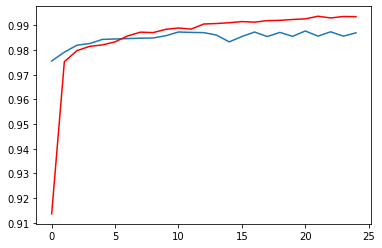

In [124]:
dir(mnist_model.history)
plt.plot(mnist_model.history.history['val_accuracy'])
plt.plot(mnist_model.history.history['accuracy'],c='r')


In [148]:
#Normalization helps so instead of just normalizing the input data I will try to normalize the outputs of dense layers 
#This possibly helps in maintaining the learning consistency across features; in this xcase pixels of the data 

mnist_model=Sequential([
                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        AveragePooling2D(pool_size=(2,2)),
                        BatchNormalization(),
                        Conv2D(filters=64,kernel_size=(3,3),strides=(1,1)),
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        BatchNormalization(),
                        Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
                        Dense(32,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
                        Dense(10,activation=tf.nn.softmax)                                              
                        
])


mnist_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 average_pooling2d_2 (Averag  (None, 13, 13, 128)      0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_22 (Bat  (None, 13, 13, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_51 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                     

In [149]:
mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


mnist_model.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=200)

Epoch 1/20
240/240 [==============================] - 5s 16ms/step - loss: 1.3488 - accuracy: 0.9489 - val_loss: 3.5880 - val_accuracy: 0.1992
Epoch 2/20
240/240 [==============================] - 3s 14ms/step - loss: 0.3613 - accuracy: 0.9836 - val_loss: 2.1428 - val_accuracy: 0.3618
Epoch 3/20
240/240 [==============================] - 3s 14ms/step - loss: 0.2360 - accuracy: 0.9854 - val_loss: 0.2430 - val_accuracy: 0.9803
Epoch 4/20
240/240 [==============================] - 3s 14ms/step - loss: 0.1963 - accuracy: 0.9876 - val_loss: 0.1951 - val_accuracy: 0.9852
Epoch 5/20
240/240 [==============================] - 3s 14ms/step - loss: 0.1652 - accuracy: 0.9891 - val_loss: 0.1590 - val_accuracy: 0.9879
Epoch 6/20
240/240 [==============================] - 3s 14ms/step - loss: 0.1401 - accuracy: 0.9909 - val_loss: 0.1498 - val_accuracy: 0.9879
Epoch 7/20
240/240 [==============================] - 3s 14ms/step - loss: 0.1212 - accuracy: 0.9922 - val_loss: 0.1375 - val_accuracy: 0.9852

In [150]:
mnist_model=Sequential([
                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        AveragePooling2D(pool_size=(2,2)),

                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        MaxPool2D(pool_size=(2,2)),

                        BatchNormalization(),
                        Conv2D(filters=64,kernel_size=(3,3),strides=(1,1)),
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        BatchNormalization(),
                        Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
                        Dense(32,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
                        Dense(10,activation=tf.nn.softmax)                                              
                        
])


mnist_model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 average_pooling2d_3 (Averag  (None, 13, 13, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_53 (Conv2D)          (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 5, 5, 128)        512       
 chNormalization)                                                
                                                     

In [151]:
mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


mnist_model.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=200)

Epoch 1/20
240/240 [==============================] - 5s 17ms/step - loss: 0.6202 - accuracy: 0.9436 - val_loss: 2.2427 - val_accuracy: 0.3262
Epoch 2/20
240/240 [==============================] - 4s 15ms/step - loss: 0.2936 - accuracy: 0.9886 - val_loss: 0.4655 - val_accuracy: 0.9242
Epoch 3/20
240/240 [==============================] - 4s 15ms/step - loss: 0.1763 - accuracy: 0.9933 - val_loss: 0.1685 - val_accuracy: 0.9869
Epoch 4/20
240/240 [==============================] - 4s 15ms/step - loss: 0.1252 - accuracy: 0.9958 - val_loss: 0.1309 - val_accuracy: 0.9890
Epoch 5/20
240/240 [==============================] - 4s 15ms/step - loss: 0.0985 - accuracy: 0.9968 - val_loss: 0.1126 - val_accuracy: 0.9883
Epoch 6/20
240/240 [==============================] - 4s 15ms/step - loss: 0.0783 - accuracy: 0.9981 - val_loss: 0.0931 - val_accuracy: 0.9912
Epoch 7/20
240/240 [==============================] - 4s 15ms/step - loss: 0.0661 - accuracy: 0.9983 - val_loss: 0.0818 - val_accuracy: 0.9912

In [ ]:
pred_probs = NNmodel.predict(x_test)
pred_probs.shape

(10000, 10)

In [ ]:
np.sum(pred_probs[0,:])

1.0000001

In [ ]:
pred_class = np.argmax(pred_probs, axis=1)
np.mean(pred_class==y_test)

0.9674

In [ ]:
NNmodel2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=10,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dense(64,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

In [ ]:
NNmodel2 = tf.keras.models.Sequential()
NNmodel2.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape))
NNmodel2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2))
NNmodel2.add(tf.keras.layers.Flatten())
NNmodel2.add(tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)))
NNmodel2.add(tf.keras.layers.Dense(64,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0005)))
NNmodel2.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [ ]:
NNmodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               184448    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 193,614
Trainable params: 193,614
Non-trainable params: 0
________________________________________________

In [ ]:
NNmodel2.fit(x_train,y_train,epochs=5,validation_split=0.2,batch_size=500)

Epoch 1/5
96/96 [==============================] - 15s 152ms/step - loss: 1.6282 - accuracy: 0.7983 - val_loss: 0.8655 - val_accuracy: 0.9240
Epoch 2/5
96/96 [==============================] - 14s 151ms/step - loss: 0.7232 - accuracy: 0.9425 - val_loss: 0.6165 - val_accuracy: 0.9570
Epoch 3/5
96/96 [==============================] - 14s 150ms/step - loss: 0.5699 - accuracy: 0.9574 - val_loss: 0.5153 - val_accuracy: 0.9661
Epoch 4/5
96/96 [==============================] - 14s 151ms/step - loss: 0.4896 - accuracy: 0.9647 - val_loss: 0.4555 - val_accuracy: 0.9690
Epoch 5/5
96/96 [==============================] - 14s 151ms/step - loss: 0.4381 - accuracy: 0.9686 - val_loss: 0.4180 - val_accuracy: 0.9725


In [ ]:
NNmodel2.predict(x_test)

array([[6.5287873e-05, 7.5331895e-06, 6.3127524e-04, ..., 9.9758267e-01,
        3.0019635e-05, 8.2740368e-04],
       [2.2000216e-04, 8.0777390e-04, 9.9821234e-01, ..., 2.2396985e-07,
        4.5951057e-04, 5.8929968e-09],
       [2.1894729e-04, 9.8462325e-01, 1.9825413e-03, ..., 8.7869214e-03,
        1.6384514e-03, 1.6235378e-04],
       ...,
       [1.8284029e-06, 2.5975501e-06, 1.6124095e-06, ..., 3.9705160e-04,
        1.5841410e-03, 6.1630188e-03],
       [2.3194090e-05, 6.5072172e-06, 4.8997941e-07, ..., 8.5936273e-07,
        2.7071964e-02, 5.8631067e-05],
       [2.8942926e-03, 5.9954090e-07, 7.9331156e-03, ..., 3.1042458e-07,
        1.5429036e-04, 5.3218369e-06]], dtype=float32)

In [ ]:
pred_probs2 = NNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

0.9721


## Functional API
we will need this eventually when we do reinforcement learning

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input

In [ ]:
imp = Input(shape=xshape)
mid = Conv2D(16,(8,8),strides=4,activation='relu')(imp)
mid = Conv2D(32,(4,4),strides=2,activation='relu')(mid)
mid = Flatten()(mid)
mid = Dense(256,activation='relu')(mid)
out0 = Dense(10,activation='softmax')(mid)
model = Model(imp,out0)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 16)          1040      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 32)          8224      
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 44,858
Trainable params: 44,858
Non-trainable params: 0
_________________________________________________________